# 1) EDA

In [1]:
#importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
#import re

In [2]:
#import the training data
v1_data = pd.read_csv("./datasets/train.csv")
v1_data.shape

(2051, 81)

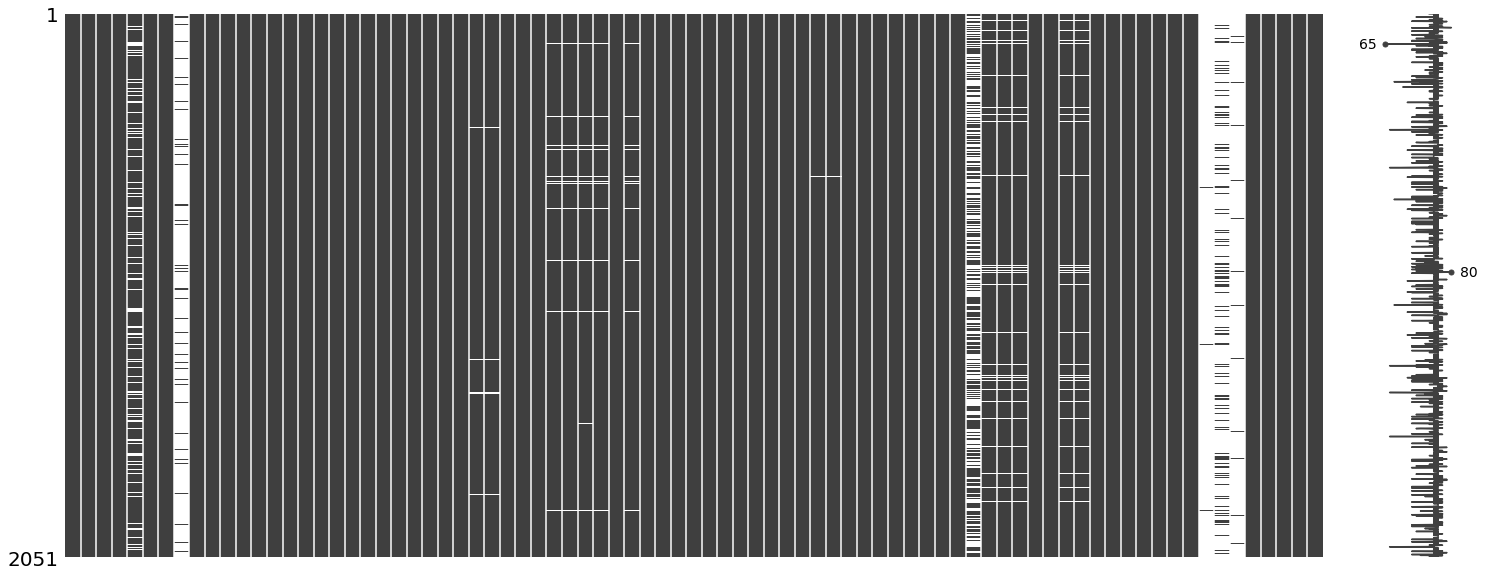

In [3]:
msno.matrix(v1_data)

In [4]:
#finding which of the 81 columns has any missing values
is_null_df_sum = pd.DataFrame(v1_data.isnull().sum())
is_null_df_sum[is_null_df_sum[0] > 0]

,0
Lot Frontage,330
Alley,1911
Mas Vnr Type,22
Mas Vnr Area,22
Bsmt Qual,55
Bsmt Cond,55
Bsmt Exposure,58
BsmtFin Type 1,55
BsmtFin SF 1,1
BsmtFin Type 2,56


As there is only a few data points in "BsmtFin SF 1","BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "Bsmt Full Bath","Bsmt Half Bath","Garage Cars","Garage Area" without a value, I removed those rows

In [5]:
v1_data[(v1_data["BsmtFin SF 1"].isnull()) | (v1_data["BsmtFin SF 2"].isnull()) | 
        (v1_data["Bsmt Unf SF"].isnull()) | (v1_data["Total Bsmt SF"].isnull()) |
        (v1_data["Bsmt Full Bath"].isnull()) | (v1_data["Bsmt Half Bath"].isnull()) |
        (v1_data["Garage Cars"].isnull()) | (v1_data["Garage Area"].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [6]:
#removing the above rows
v2_data = v1_data.drop([616,1327,1712],axis=0)

In [7]:
#using .describe to see if any numeric columns ahve values that don't make sense
#using pd.set_options("max_columns",None) to see all the columns
pd.set_option("max_columns",None)
v2_data.describe(percentiles=[.25,.5,.75,.95])

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2048.000000,2.048000e+03,2048.000000,1718.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2026.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,1935.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,1473.713867,7.133064e+08,57.038574,69.017462,10049.675293,6.114258,5.560547,1971.751465,1984.193848,99.843534,442.464844,48.005859,568.130859,1058.601562,1163.431152,329.378906,5.520996,1498.331055,0.427734,0.063477,1.576660,0.371094,2.842773,1.042969,6.435059,0.590820,1978.734884,1.776855,473.692871,93.886230,47.444824,22.501465,2.595215,16.535645,2.401367,51.649902,6.222168,2007.775879,181484.252441
std,844.425431,1.886843e+08,42.839004,23.228719,6697.167566,1.426126,1.104349,30.174112,21.033925,175.050567,461.319862,165.074675,444.958855,448.999749,392.294626,425.680677,51.105842,497.948344,0.522715,0.251763,0.548553,0.501083,0.825631,0.209937,1.557145,0.637957,25.439416,0.764702,215.972053,128.597923,66.393358,59.738209,25.247901,57.412746,37.810135,573.810601,2.745331,1.312844,79248.657891
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,752.750000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1954.000000,1964.750000,0.000000,0.000000,0.000000,220.000000,793.000000,879.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129837.500000
50%,1483.500000,5.354532e+08,50.000000,68.000000,9432.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,475.000000,995.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2197.500000,9.071770e+08,70.000000,80.000000,11512.750000,7.000000,6.000000,2001.000000,2004.000000,161.750000,734.000000,0.000000,811.000000,1319.000000,1405.000000,691.750000,0.000000,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,2789.650000,9.164022e+08,160.000000,105.150000,16758.450000,8.000000,8.000000,2007.000000,2007.000000,463.500000,1272.950000,414.900000,1492.950000,1757.550000,1800.650000,1133.650000,0.000000,2470.550000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2007.000000,3.000000,856.650000,325.950000,180.000000,175.650000,0.000000,165.000000,0.000000,0.000000,11.000000,2010.000000,335000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.0000

In [8]:
#then using pd.reset_option("max_columns") to revert the amount of shown columns
#pd.reset_option("max_columns")

To look at further - 
- Lot Area - max value of 159,000 seems an order of magnitude larger than the rest
- Mas Vnr Area  - max value of 1600 seems an order of magnitude larger
- BsmtFin SF 2  - 75% is 0 so im curious how many values are in the column
- Low Qual Fin SF - 95% is 0 so im curious how many values are in the column
- 3Ssn Porch - 95% is 0 so im curious how many values are in the column
- SalePrice - Check the min value 12,789 seem low when 25% in 130,000

In [9]:
#Lot Area - max value of 159,000 seems an order of magnitude larger than the rest
v2_data["Lot Area"].sort_values(ascending=False).head(8)

471     159000
694     115149
1854     70761
960      63887
745      57200
823      53504
1052     53227
1843     53107
Name: Lot Area, dtype: int64

In [10]:
v2_data.reset_index
v2_data.loc[[471,694,1854],:]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,302000
1854,2767,906475200,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655.0,Unf,0.0,878.0,1533.0,GasA,TA,Y,SBrkr,1533,0,0,1533,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975.0,Unf,2.0,576.0,TA,TA,Y,200,54,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,280000


Upon research the lot areas are correct (just significantly larger than typical values)

Mas Vnr Area - max value of 1600 seems an order of magnitude larger

In [11]:
v2_data[v2_data["Mas Vnr Area"] > 1200]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1409,1850,533241030,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649.0,Unf,0.0,326.0,975.0,GasA,Ex,Y,SBrkr,975,975,0,1950,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2.0,576.0,TA,TA,Y,0,10,0,0,198,0,NaN,NaN,NaN,0,6,2007,WD,239000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


Checks out, not a typo

BsmtFin SF 2 - 75% is 0 so im curious how many values are in the column

In [12]:
v2_data["BsmtFin SF 2"][v2_data["BsmtFin SF 2"] > 0].describe()

count     247.000000
mean      398.040486
std       294.709624
min         6.000000
25%       160.500000
50%       308.000000
75%       553.000000
max      1474.000000
Name: BsmtFin SF 2, dtype: float64

There are 247 values that aren't 0 in the BsmtFin SF 2 column.
Might want to ignore this input for the model (we'll see later)

Low Qual Fin SF - 95% is 0 so im curious how many values are in the column

In [13]:
v2_data["Low Qual Fin SF"][v2_data["Low Qual Fin SF"] > 0].describe()

count      33.000000
mean      342.636364
std       218.989557
min        53.000000
25%       144.000000
50%       362.000000
75%       479.000000
max      1064.000000
Name: Low Qual Fin SF, dtype: float64

There are 33 values that aren't 0 in Low Qual Fin SF column. This will be ignored (potentially removed from the data set)

3Ssn Porch - 95% is 0 so im curious how many values are in the column

In [14]:
v2_data[["Wood Deck SF","Open Porch SF","Enclosed Porch","3Ssn Porch","Screen Porch"]][v2_data[["Wood Deck SF","Open Porch SF","Enclosed Porch","3Ssn Porch","Screen Porch"]] > 0].describe()

,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch
count,975.000000,1138.000000,326.000000,26.000000,181.000000
mean,197.209231,85.384007,141.358896,204.423077,187.099448
std,119.827337,68.511625,74.991836,96.365626,73.455437
min,4.000000,4.000000,16.000000,86.000000,53.000000
25%,120.000000,39.000000,84.000000,150.750000,144.000000
50%,168.000000,63.000000,135.500000,168.000000,174.000000
75%,240.000000,110.750000,192.000000,239.750000,217.000000
max,1424.000000,547.000000,432.000000,508.000000,490.000000


After looking at the 3 season porch data. All of the porch data might just be a yes or no for the type of porch. Need to see how the porch size affects price (if it does significiantly???)

SalePrice - Check the min value 12,789 seem low when 25% in 130,000

In [15]:
v2_data[v2_data["SalePrice"] < 50_000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
103,728,902477130,30,C (all),72.0,9392,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,3,1900,1950,Mansard,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,245.0,245.0,GasA,TA,N,SBrkr,797,0,0,797,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,36,94,0,0,0,NaN,NaN,NaN,0,9,2009,WD,44000
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
408,1556,911102170,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,649.0,649.0,GasA,TA,N,SBrkr,649,668,0,1317,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1.0,250.0,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,40000
1089,709,902205010,30,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseA,612,0,0,612,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1965.0,Unf,1.0,308.0,TA,Fa,N,0,0,25,0,0,0,NaN,NaN,NaN,0,10,2009,WD,45000
1292,2844,909101330,30,RL,60.0,8088,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,2,3,1922,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,498.0,498.0,GasA,TA,N,FuseF,498,0,0,498,0.0,0.0,1,0,1,1,TA,3,Typ,0,NaN,Detchd,1922.0,Unf,1.0,216.0,Fa,Fa,N,0,0,100,0,0,0,NaN,NaN,NaN,0,2,2006,ConLD,35000
1309,727,902477120,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0,720,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,34900
1428,1902,534450090,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseF,334,0,0,334,0.0,0.0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,39300
1518,2881,911175430,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50.0,Unf,0.0,430.0,480.0,GasA,TA,N,FuseA,480,0,0,480,1.0,0.0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1.0,308.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,35311
1564,710,902205030,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,600.0,600.0,Grav,Fa,N,SBrkr,600,368,0,968,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,GdWo

Values are correct (maybe just outliers which shouldn't be considered)

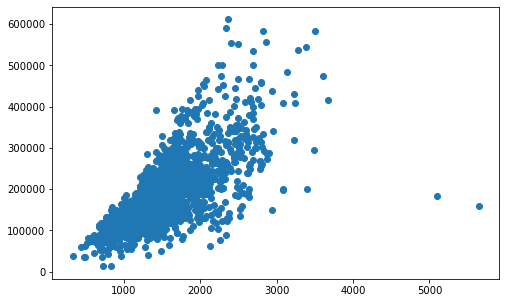

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(v2_data["Gr Liv Area"],v2_data["SalePrice"]);

Need to remove the 2 houses with sq ft over 5000. They are outliers in this data set

In [17]:
v3_data = v2_data.drop([960,1885], axis=0)

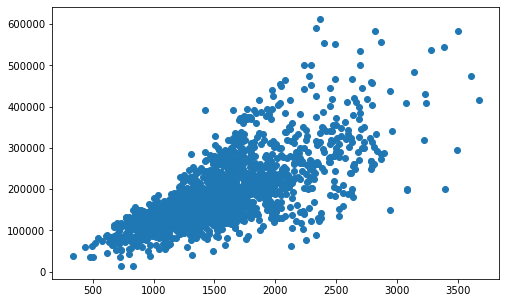

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(v3_data["Gr Liv Area"],v3_data["SalePrice"]);

# Further attempts and cleaning

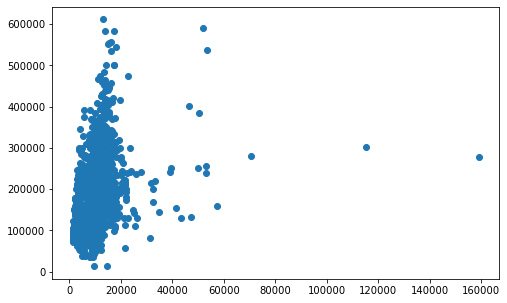

In [19]:
#want to include lot size in model but it might be non-linear or have outliers
plt.figure(figsize=(8,5))
plt.scatter(v3_data["Lot Area"],v3_data["SalePrice"]);

In [20]:
# as shown above lot size above 30,000 sq ft doesn't fit with the majority of the data
# removing thoes values with lot size above 30,000 sq ft
v4_data = v3_data[v3_data["Lot Area"] < 30_000]

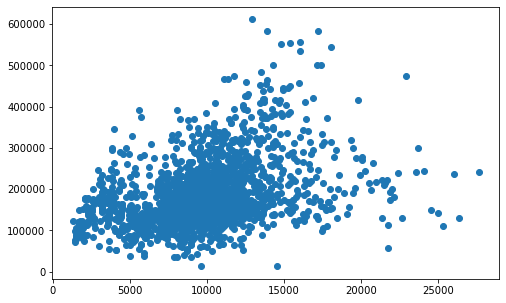

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(v4_data["Lot Area"],v4_data["SalePrice"]);

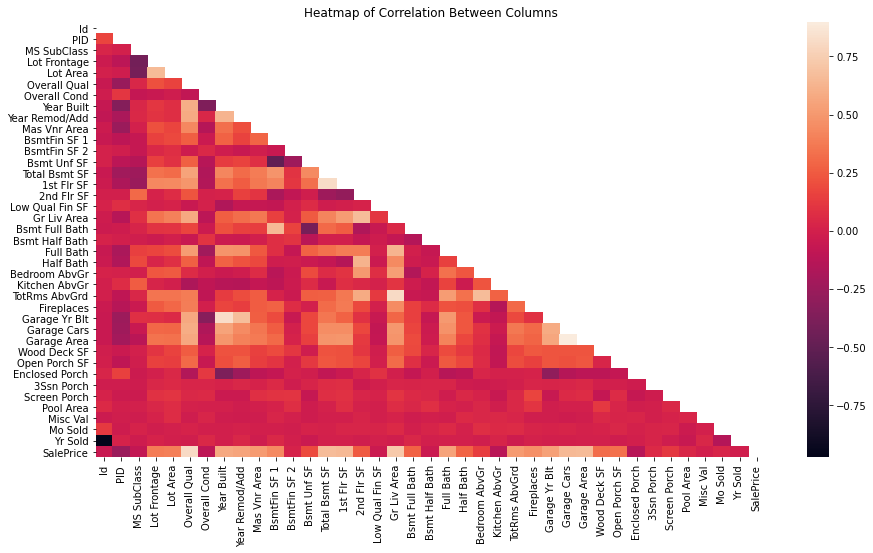

In [22]:
#Generating a heat map before I look at further trends
plt.figure(figsize=(15,8))

corr = v4_data.corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask).set_title("Heatmap of Correlation Between Columns");

In [23]:
v4_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

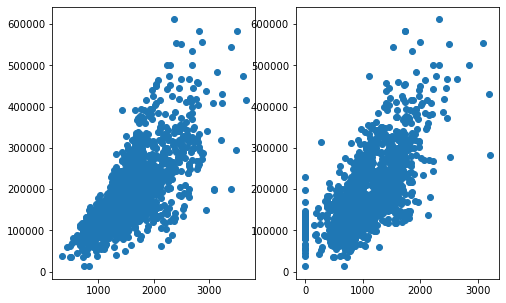

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
ax[0].scatter(v4_data["Gr Liv Area"],v4_data["SalePrice"])
ax[1].scatter(v4_data["Total Bsmt SF"],v4_data["SalePrice"]);

Seems to be a strong relationship between Above and Below ground SF and the salePrice 

## Further Investigations Based on Feature Engineering

Looking at the MS Zoning data and inspecting the strange values

In [25]:
v4_data[(v4_data["MS Zoning"] == "A (agr)") | (v4_data["MS Zoning"] == "I (all)") ]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
581,946,912251110,30,I (all),109.0,21780,Grvl,NaN,Reg,Lvl,NoSewr,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,57625


Might want to remove A and I zoning data from dataset as they have large lot areas and might significantly effect fit 

Looking at Utilities 

In [26]:
v4_data[(v4_data["Utilities"] == "NoSewr") | (v4_data["Utilities"] == "NoSeWa") | (v4_data["Utilities"] == "ELO")]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
561,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111.0,Rec,354.0,354.0,819.0,GasA,Gd,Y,FuseA,1344,0,0,1344,0.0,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2.0,525.0,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,137500
581,946,912251110,30,I (all),109.0,21780,Grvl,NaN,Reg,Lvl,NoSewr,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,57625


Looking at 

In [27]:
v4_data[v4_data["Garage Yr Blt"] > 2010]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


In [28]:
#row 1699 garage yr blt = 2207 needs to be changed to 2007
v4_data.at[1699,"Garage Yr Blt"] = 2007

In [29]:
#need to deal with this data point
v4_data[v4_data["Wood Deck SF"] > 1000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
966,2294,923229100,80,RL,NaN,15957,Pave,NaN,IR1,Low,AllPub,Corner,Mod,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,1148.0,Unf,0.0,96.0,1244.0,GasA,TA,Y,SBrkr,1356,0,0,1356,2.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1977.0,Fin,2.0,528.0,TA,TA,Y,1424,0,0,0,0,0,NaN,MnPrv,NaN,0,9,2007,WD,188000


In [30]:
v4_data.shape

(2024, 81)

In [31]:
#removing outlier in lot frontage
v4_data.drop(v4_data.loc[v4_data["Lot Frontage"] > 300].index,inplace=True)

C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Importing testing data

In [32]:
testing_data = pd.read_csv('./datasets/test.csv')

## Creating new columns

In [33]:
v4_data["Total SF"] = v4_data["Total Bsmt SF"] + v4_data["Gr Liv Area"]
testing_data["Total SF"] = testing_data["Total Bsmt SF"] + testing_data["Gr Liv Area"]

C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
v4_data["Total Bathrooms"] = v4_data["Bsmt Full Bath"] + v4_data["Full Bath"] + 0.5*(v4_data["Bsmt Half Bath"]) + 0.5*(v4_data["Half Bath"])
testing_data["Total Bathrooms"] = testing_data["Bsmt Full Bath"] + testing_data["Full Bath"] + 0.5*(testing_data["Bsmt Half Bath"]) + 0.5*(testing_data["Half Bath"])

C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Exporting Cleaned Data

In [35]:
v4_data.to_csv("./datasets/Clean_training_data.csv",index=False)

In [36]:
testing_data.to_csv("./datasets/kaggle_test.csv",index=False)